Лабораторная работа 4. **Модели случайных графов и выборки**

In [63]:
%pip install fastchunglu

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement fastchunglu (from versions: none)
ERROR: No matching distribution found for fastchunglu
You should consider upgrading via the 'c:\Users\Admin\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [40]:
import requests
import numpy as np
import pandas as pd
import apimoex
import matplotlib.pyplot as plt
import igraph as ig
import networkx as nx
from ts2vg import NaturalVG

1. 
Используя характеристики графа (количество ребер, количество вершин) из лабораторной работы 1 сгенерируете случайные графы с использованием различных моделей: Эрдеша-Реньи, Барабаши-Альберта, Чунг-Лу и Кронекера (детерминированный и стохастический, инициализационная матрица 4x4, степень k подобрать самостоятельно). 
Для реализации модели стохастической модели Кронекера можно использовать np.kron().


In [41]:
import pickle

file = open("returns_SBER_3.pickle", 'rb')
df = pickle.load(file)
ts = np.array(df)

In [42]:
start_day = 1344
year = 253
cur_ticker = 'SBER'

g = NaturalVG(directed=None).build(ts[start_day:start_day+year])
nxg = g.as_networkx()
g_igraph = g.as_igraph()

In [54]:
n_edges = len(list(g.edges))
n_vertices = g.n_vertices
print(f'edges : {n_edges}, vertices : {n_vertices}')
probability_of_edge_creation = nx.density(nxg)

edges : 750, vertices : 253


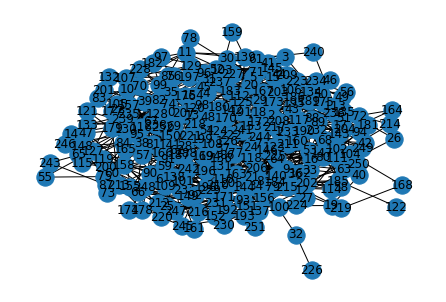

In [55]:
# Эрдеша-Реньи
g_er = nx.erdos_renyi_graph(n_vertices, probability_of_edge_creation)
nx.draw(g_er, pos=nx.kamada_kawai_layout(g_er), with_labels=True)
plt.show()

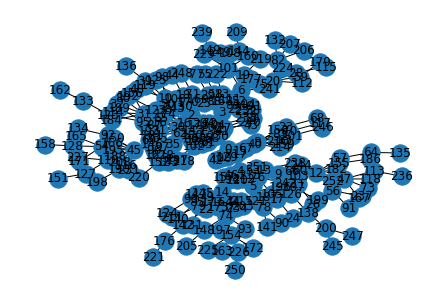

In [58]:
# Барабаши-Альберта
g_ba=nx.barabasi_albert_graph(n_vertices, 1)
nx.draw(g_ba, pos=nx.kamada_kawai_layout(g_ba), with_labels=True)
plt.show()

In [ ]:
# Чунг-Лу
import fastchun

Создам 1000 графов

In [61]:
N_graphs = 10
erdos_renyi_graph_list = []
barabasi_albert_graph = []

for i in range(N_graphs):
    erdos_renyi_graph_list.append(nx.erdos_renyi_graph(n_vertices, probability_of_edge_creation))
    barabasi_albert_graph.append(nx.barabasi_albert_graph(n_vertices, 1))



4.
Сравните спектральные и топологические характеристики для исходного графа и усредненные значения для 1000 графов полученных в результате выборок (Монте-Карло).